In [1]:
library("phenopath")
library("reticulate")

In [2]:
np <- import("numpy")

In [4]:
npzfile <- np$load('counts_5000.npz')
cell_counts <- npzfile[["cell_counts"]]
cell_init_vectors <- npzfile[["cell_init_vectors"]]

In [8]:
z_init = c(rep(1,5000), rep(2,5000), rep(3,5000), rep(4,5000), rep(5,5000))

In [10]:
time_start <- proc.time()
phenopath_results <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -2.58214415045703e+20 	 Inf 
[ 2 ] 	 -3352229.07404687 	 7702767601558297 
[ 3 ] 	 -3352228.52966211 	 1.62394884246339e-05 
[ 4 ] 	 -3352228.52762794 	 6.06810864378161e-08 


   user  system elapsed 
  3.505   0.177   1.805 

In [11]:
interaction_effects(phenopath_results)

5.111209e-08,9.305988e-07,3.742068e-15,6.502502e-15,9.659568e-12,4.694521e-11,5.134228e-08,2.886507e-15,2.357869e-05
2.017293e-08,7.265962e-06,4.296535e-15,4.561658e-15,2.473604e-10,8.023236e-10,7.507036e-08,2.684734e-15,2.423706e-05
1.425469e-08,1.616251e-06,7.462283e-15,-5.329176e-18,2.003189e-10,5.546308e-11,6.210311e-08,2.380632e-15,2.161245e-05
8.002026e-09,1.099126e-06,3.438023e-17,6.683607e-15,-5.035561e-12,9.440763e-12,3.255897e-08,2.282556e-16,7.451455e-07
5.896777e-09,1.082720e-06,1.111714e-15,1.678061e-16,2.433610e-10,1.768872e-11,3.040263e-08,2.865990e-16,2.729281e-06
2.420368e-08,1.240841e-06,3.034906e-15,1.681640e-16,1.983212e-10,7.017501e-10,4.156973e-08,1.548241e-15,1.598376e-05
1.264849e-08,1.488682e-07,2.480277e-15,-2.904471e-17,1.007467e-11,9.067259e-12,2.619349e-07,1.411026e-15,1.182303e-05
1.063480e-08,3.492809e-07,1.018294e-15,-4.837388e-17,1.719473e-12,2.349896e-12,2.022681e-08,-1.398304e-13,1.454203e-05
5.219450e-08,8.569597e-07,7.480834e-15,6.551243e-15,2.682731e-12,1.949544e-11,6.772454e-08,4.623435e-15,4.558108e-05


ok so with that combination of additional parameters it converges really quickly, and seemingly to a suboptimal local minimum?

so is it `scale_y`'s fault? or `z_init`'s? I should double check too that the `np.reshape`ing is actually leading the first 5000 columns to be from the first batch, etc. etc.

also interesting that this gets really small values, the same way that the more naive gLV-like did. maybe for same reason, sparsity of data? I don't know though to be honest

In [13]:
time_start <- proc.time()
phenopath_results <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE,
                              z_init=z_init)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -512191.696628286 	 Inf 
[ 2 ] 	 -452389.332096319 	 13.219225187042 
[ 3 ] 	 -437099.518278683 	 3.49801662510351 
[ 4 ] 	 -436343.662640581 	 0.173224846105792 
[ 5 ] 	 -438614.544256762 	 0.517739697854479 
[ 6 ] 	 -441224.324435955 	 0.591486016218452 
[ 7 ] 	 -443687.036945926 	 0.555056223170862 
[ 8 ] 	 -445934.961106502 	 0.504092380421984 
[ 9 ] 	 -447983.872571438 	 0.457362773614083 
[ 10 ] 	 -449858.783610517 	 0.416777688329451 
[ 11 ] 	 -451576.771583389 	 0.380442060128164 
[ 12 ] 	 -453145.118552919 	 0.346102585092079 
[ 13 ] 	 -454562.599253845 	 0.311833992337349 
[ 14 ] 	 -455820.747410357 	 0.276018185582732 
[ 15 ] 	 -456904.327823343 	 0.237156959783713 
[ 16 ] 	 -457790.797243389 	 0.193640725279858 
[ 17 ] 	 -458448.510577342 	 0.143465038881738 
[ 18 ] 	 -458833.119934453 	 0.0838233641820875 
[ 19 ] 	 -458881.024504196 	 0.0104394313961795 
[ 20 ] 	 -458497.888164649 	 0.0835633815197316 
[ 21 ] 	 -457540.931373839 	 0.20915

Warning message in clvm(y, x_mat, elbo_tol = elbo_tol, z_init = z_init, ...):
“ELBO not converged”


    user   system  elapsed 
3073.589  245.113 3317.472 

ok it seems like it is `scale_y`'s fault. but you know maybe it isn't `scale_y`'s fault alone?

hm isn't the elbo supposed to get larger with more iterations anyway? this just made it worse/go from negatvie 500 thousand to negative 5 million with change what the heck

In [14]:
time_start <- proc.time()
phenopath_results <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -2.20339756687036e+22 	 Inf 
[ 2 ] 	 -3352756.51389029 	 657189854897543040 
[ 3 ] 	 -3352245.54795792 	 0.0152424971579588 
[ 4 ] 	 -3352229.56661412 	 0.000476737749547599 
[ 5 ] 	 -3352228.53513317 	 3.07700070151892e-05 
[ 6 ] 	 -3352228.52764232 	 2.23458881763724e-07 


   user  system elapsed 
  3.944   0.253   2.180 

ok so yeah it is definitely `scale_y`'s fault huh

In [15]:
interaction_effects(phenopath_results)

-8.701479e-08,-8.832808e-07,-7.419381e-15,-1.280549e-14,7.656437e-12,-7.857828e-12,-5.605090e-08,-5.706210e-15,-4.719233e-05
-3.330558e-08,-3.129042e-06,-8.450155e-15,-8.256114e-15,-5.610905e-11,-1.992827e-10,-5.384835e-08,-5.210112e-15,-4.836088e-05
-2.649272e-08,-1.095520e-06,-1.481932e-14,1.016900e-17,-4.738255e-11,-1.423889e-11,-4.069095e-08,-4.690776e-15,-4.320947e-05
-1.548838e-08,-3.209756e-07,-6.247461e-17,-1.253974e-14,1.655243e-11,3.792528e-12,5.740328e-09,-4.499727e-16,-1.486072e-06
-9.794883e-09,-3.429072e-07,-2.213685e-15,1.323818e-16,-2.801172e-11,2.923028e-12,-1.326607e-09,-5.629067e-16,-5.466581e-06
-4.646033e-08,-7.865834e-07,-6.025530e-15,1.316834e-16,-4.725737e-11,3.559131e-12,-3.326305e-08,-3.045695e-15,-3.198154e-05
-2.398371e-08,-2.920548e-07,-4.935757e-15,2.165192e-16,6.855673e-12,1.134854e-12,-6.782151e-08,-2.779342e-15,-2.368269e-05
-2.118099e-08,-6.023672e-07,-2.008092e-15,9.462945e-17,-1.948186e-13,-4.279476e-12,-3.267633e-08,2.620642e-13,-2.907668e-05
-1.045857e-07,-1.576352e-06,-1.497225e-14,-1.290092e-14,-4.633342e-12,-2.407515e-11,-1.214162e-07,-9.241838e-15,-9.183773e-05


In [16]:
time_start <- proc.time()
phenopath_results_scaled_y <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE,
                              z_init=z_init)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -512191.696628286 	 Inf 
[ 2 ] 	 -452389.332096319 	 13.219225187042 
[ 3 ] 	 -437099.518278683 	 3.49801662510351 
[ 4 ] 	 -436343.662640581 	 0.173224846105792 
[ 5 ] 	 -438614.544256762 	 0.517739697854479 
[ 6 ] 	 -441224.324435955 	 0.591486016218452 
[ 7 ] 	 -443687.036945926 	 0.555056223170862 
[ 8 ] 	 -445934.961106502 	 0.504092380421984 
[ 9 ] 	 -447983.872571438 	 0.457362773614083 
[ 10 ] 	 -449858.783610517 	 0.416777688329451 
[ 11 ] 	 -451576.771583389 	 0.380442060128164 
[ 12 ] 	 -453145.118552919 	 0.346102585092079 
[ 13 ] 	 -454562.599253845 	 0.311833992337349 
[ 14 ] 	 -455820.747410357 	 0.276018185582732 
[ 15 ] 	 -456904.327823343 	 0.237156959783713 
[ 16 ] 	 -457790.797243389 	 0.193640725279858 
[ 17 ] 	 -458448.510577342 	 0.143465038881738 
[ 18 ] 	 -458833.119934453 	 0.0838233641820875 
[ 19 ] 	 -458881.024504196 	 0.0104394313961795 
[ 20 ] 	 -458497.888164649 	 0.0835633815197316 
[ 21 ] 	 -457540.931373839 	 0.20915

Warning message in clvm(y, x_mat, elbo_tol = elbo_tol, z_init = z_init, ...):
“ELBO not converged”


    user   system  elapsed 
3221.844  298.808 3524.545 

In [17]:
interaction_effects(phenopath_results_scaled_y)

-6225.916,-1310.5275,-1196.8286,-268.3524,-362.1820,-0.2199099,-1348.0800,-0.08901645,-2930.915
-5780.648,-1227.7689,-1111.8560,-249.7998,-336.6572,-0.2594691,-1253.3867,-0.17303626,-2725.101
-5416.148,-1141.7247,-1042.2010,-233.7526,-315.4253,-0.3277774,-1173.6403,-0.24349888,-2555.197
-6220.942,-1312.2397,-1196.5083,-267.7942,-363.3341,-0.1150741,-1344.2981,-0.09856902,-2938.030
-6317.783,-1333.3491,-1214.6443,-272.5818,-371.2388,-0.1097616,-1363.0131,-0.07044722,-2980.282
-4692.983,-989.2656,-902.5597,-202.7777,-273.0978,1.7114256,-1015.4241,-0.26746291,-2209.992
-4462.753,-939.7328,-858.3545,-192.7111,-260.0842,-0.2986248,-959.3637,-0.27590587,-2103.317
-3985.433,-838.2392,-764.3118,-171.4118,-231.4387,-0.2879686,-861.7124,1.43210759,-1874.684
-4096.346,-860.8819,-785.8845,-176.7528,-237.7810,-0.2389188,-885.8083,-0.25725340,-1928.461


In [18]:
time_start <- proc.time()
phenopath_results_scaled_y_brief <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE,
                              z_init=z_init, elbo_tol=1)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -512191.696628286 	 Inf 
[ 2 ] 	 -452389.332096319 	 13.219225187042 
[ 3 ] 	 -437099.518278683 	 3.49801662510351 
[ 4 ] 	 -436343.662640581 	 0.173224846105792 


   user  system elapsed 
  3.469   0.276   1.906 

In [19]:
interaction_effects(phenopath_results_scaled_y_brief)

-6.035605,-0.8020866,-5.544247,-2.582219,1.967056,4.881866,0.17590463,3.151457,3.250713
-6.206175,-2.0135598,-6.795778,-3.339848,2.353309,6.019759,0.22622368,3.906577,3.811995
-6.330398,-0.9854669,-7.011569,-3.122063,2.349411,6.082566,0.31481007,3.968608,3.714196
-5.243273,-0.9045721,-5.544575,-2.926327,2.719552,4.961312,0.37119919,3.226511,2.690063
-4.652187,-0.8333145,-4.981625,-2.461616,3.125049,4.453605,0.39666825,2.901702,2.580599
-5.598125,-0.9432496,-5.965740,-2.826586,1.979360,5.987760,0.26490108,3.436348,3.234758
-5.483096,-0.8966200,-5.923228,-2.823897,1.985161,5.190513,-0.04011147,3.422005,3.130921
-5.184175,-0.8532228,-5.494786,-2.537736,1.867594,4.886759,0.18361006,3.736762,2.992967
-4.884152,-0.8035468,-5.230951,-2.454799,1.766919,4.592062,0.16679513,2.989844,3.077556


In [20]:
(-436343.662640581 - -437099.518278683)/25000

[1] 0.03023423

In [21]:
0.0302342255240795 / 436343

[1] 6.929004e-08

OK so yeah it seems like 1% tolerance is the answer then.

In [22]:
time_start <- proc.time()
phenopath_results_scaled_y_brief_no_z_init <- phenopath(cell_counts, cell_init_vectors, model_mu=TRUE, elbo_tol=1)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -375234.673793161 	 Inf 
[ 2 ] 	 -336441.359311774 	 11.5304832202387 
[ 3 ] 	 -300579.408387576 	 11.9309406843852 
[ 4 ] 	 -259252.32869691 	 15.9408711576053 
[ 5 ] 	 -227144.931528523 	 14.1352029967507 
[ 6 ] 	 -206136.723818781 	 10.1913949734694 
[ 7 ] 	 -190855.72693753 	 8.00656974063627 
[ 8 ] 	 -178259.183652745 	 7.06642038107997 
[ 9 ] 	 -166863.972017162 	 6.82904254155669 
[ 10 ] 	 -157038.286743066 	 6.25687243402739 
[ 11 ] 	 -149952.012386045 	 4.72569473677862 
[ 12 ] 	 -145108.440718247 	 3.33789794985296 
[ 13 ] 	 -141167.642600276 	 2.79157322838512 
[ 14 ] 	 -137511.182243194 	 2.65902764955863 
[ 15 ] 	 -133859.601392107 	 2.72791851545291 
[ 16 ] 	 -130000.147719556 	 2.96880714387863 
[ 17 ] 	 -126018.745198726 	 3.15937324606119 
[ 18 ] 	 -122599.521395015 	 2.78893731786619 
[ 19 ] 	 -120331.209594149 	 1.88505692622628 
[ 20 ] 	 -119010.297232263 	 1.10991434573754 
[ 21 ] 	 -118222.391270639 	 0.666460856657635 


   user  system elapsed 
  8.708   0.795   7.478 

OK so the ELBO actually seems to be better if you don't give it a z_init, although more iterations are required and the runtime noticeably longer, hm...

In [24]:
interaction_effects(phenopath_results_scaled_y_brief_no_z_init)

1.81187043,-0.062147736,-0.04554395,-0.001313800,-0.0005714561,0.000146416,-0.169382026,-0.001831523,-0.02051794
-0.05027609,1.697669915,-0.04479538,-0.007211405,-0.0027514288,-0.057284336,-0.004527903,-0.002628022,-0.05379147
0.16433289,-0.001981468,-0.57431273,-0.001269920,0.0087296069,-0.333173883,0.446396827,0.002444739,0.08689601
0.58471465,0.005057975,-0.14487975,-0.017207407,0.8038748314,0.191135266,0.770854147,-0.000746372,-0.10062341
-0.69679622,-0.146553736,0.13680095,0.005685738,2.1594052271,-0.203152789,-0.871252507,-0.001477518,0.06698733
-0.06392488,-0.129093690,-0.01689461,-0.002326797,-0.0012383936,1.378537394,-0.061764408,-0.002375113,-0.03353261
-0.41461651,-0.123105465,-0.06108272,-0.004468786,-0.0050209488,0.055910438,2.353030233,-0.002159092,-0.06078100
-0.07702995,-0.084499820,-0.01667803,-0.001319535,-0.0007831722,-0.019492744,-0.067420902,2.042578183,-0.02808926
-0.17814085,-0.566279241,-0.41538776,0.070618730,0.0218080442,-0.144608815,-0.374565953,0.004370810,-10.44264791


huh wow you know most of these values are arguably even more reasonable, especially given that the model's true interaction coefficients were sampled from the unit interval? I mean geez I guess I could try testing the performance of various choices of `phenopath` settings the way I did for the log ratio coefficients, although I would _really_ prefer not going through so much effort.

but yeah honestly maybe I should, meh, to be thorough I guess, I don't know

## Do the compare the `z`'s thing with real time

following here: https://www.bioconductor.org/packages/release/bioc/vignettes/phenopath/inst/doc/introduction_to_phenopath.html#examining-results

In [26]:
library("ggplot2")

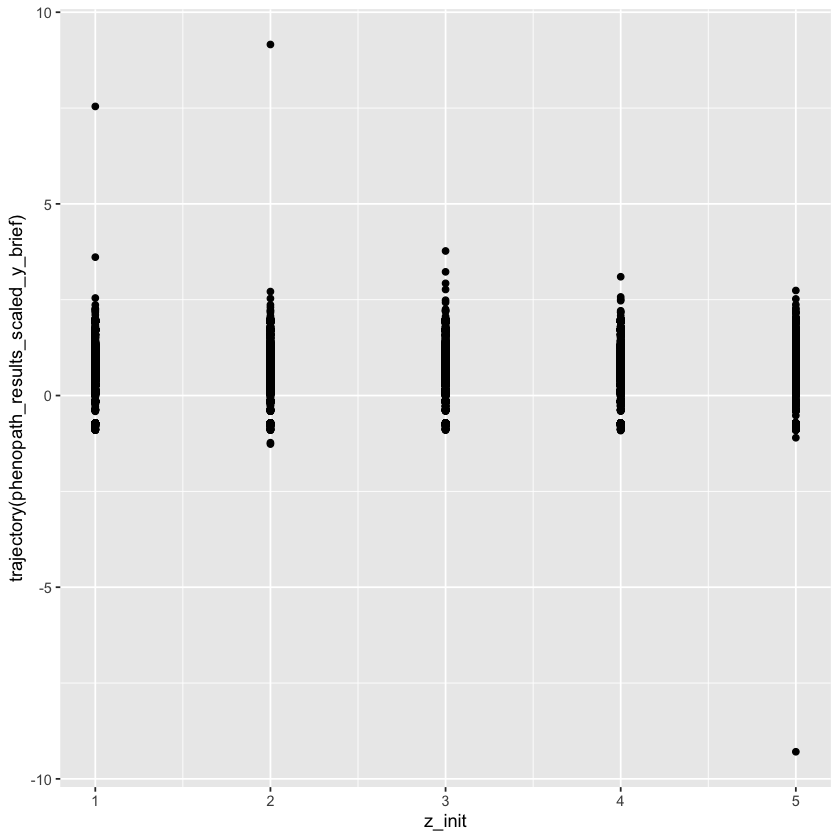

In [28]:
qplot(z_init, trajectory(phenopath_results_scaled_y_brief))

In [32]:
cor(z_init, trajectory(phenopath_results_scaled_y_brief))

[1] -0.009274925

OK I think that's good? Then what about for the results it gets without the initial hint/nudge?

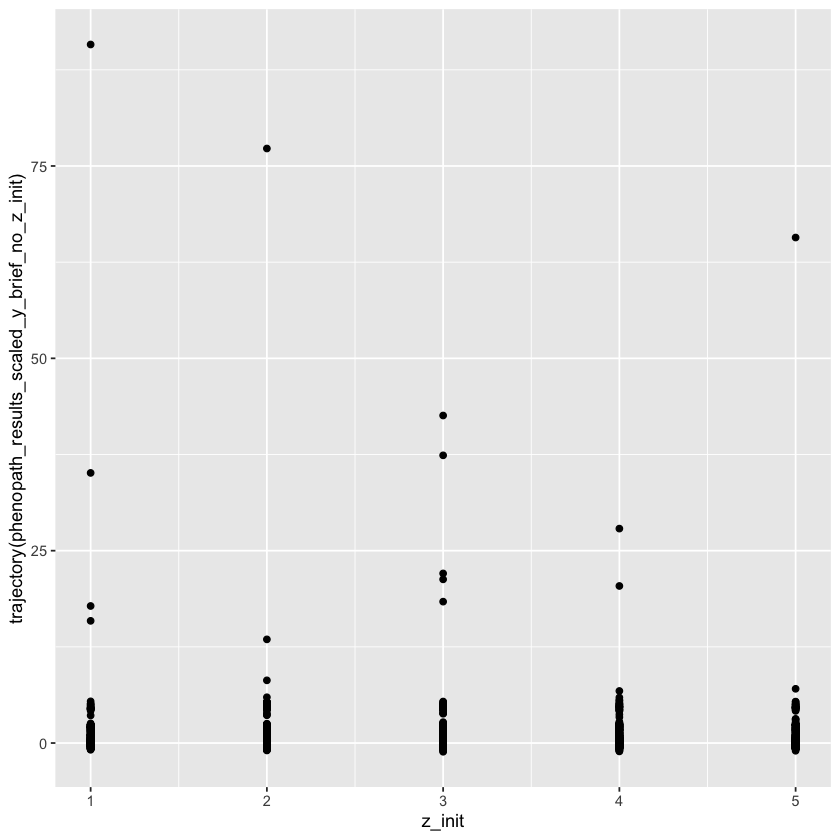

In [29]:
qplot(z_init, trajectory(phenopath_results_scaled_y_brief_no_z_init))

In [33]:
cor(z_init, trajectory(phenopath_results_scaled_y_brief_no_z_init))

[1] -0.006646904

OK actually decently good too I think albeit also a little all over the place? like eh I don't know? eh eh eh?

the ELBO was better after all, I don't know, plus stochasticity, but you know, eh, eh?

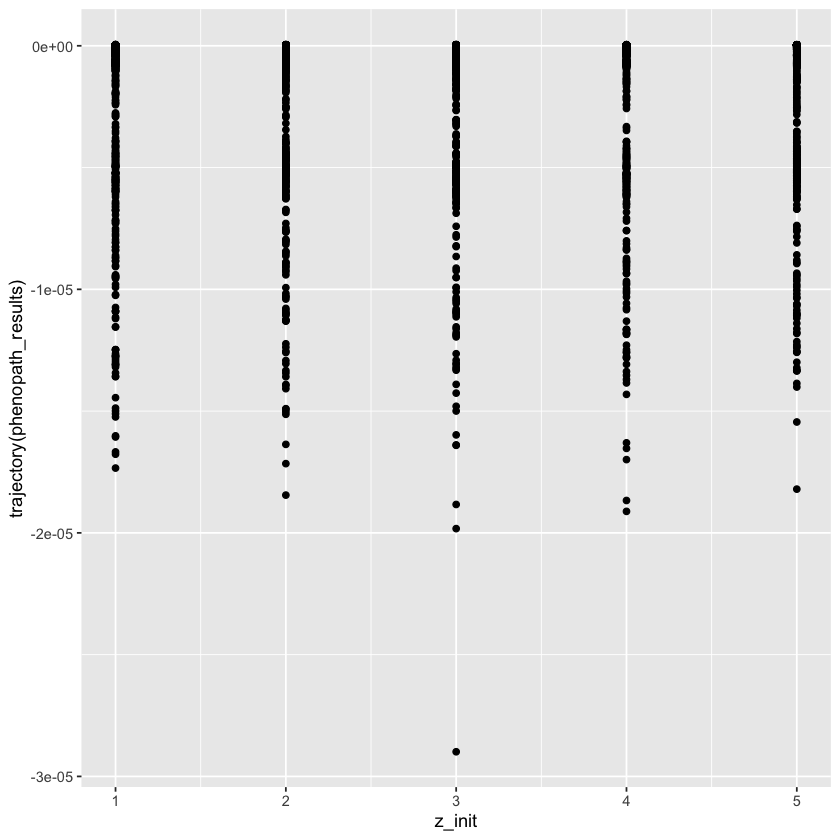

In [30]:
qplot(z_init, trajectory(phenopath_results))

In [34]:
cor(z_init, trajectory(phenopath_results))

[1] 0.004630964

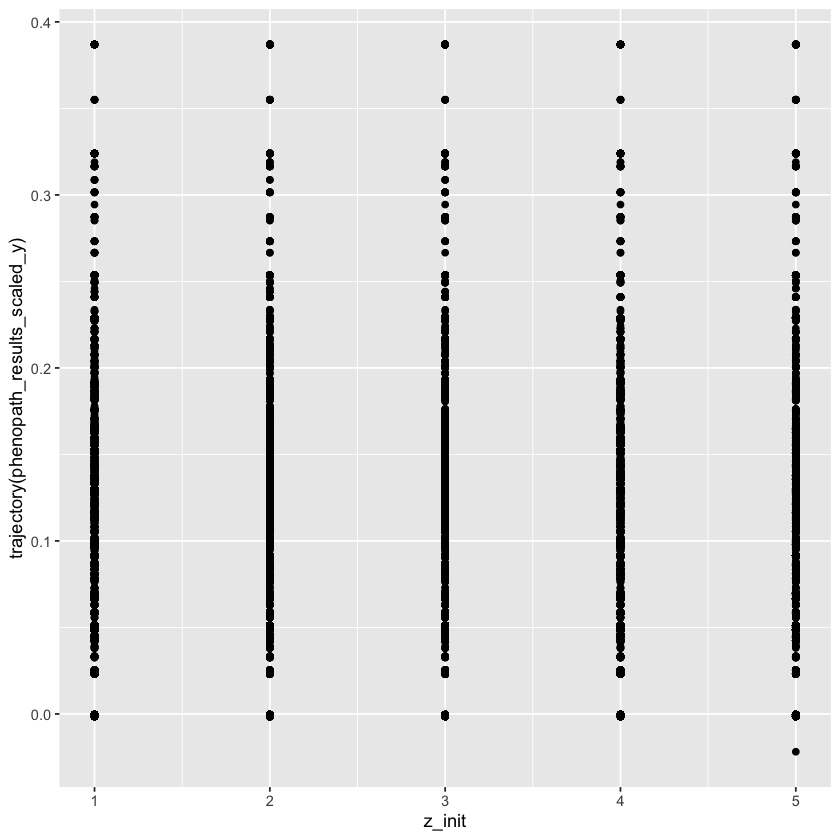

In [31]:
qplot(z_init, trajectory(phenopath_results_scaled_y))

In [35]:
cor(z_init, trajectory(phenopath_results_scaled_y))

[1] -0.002752635

no wait actually now that I think about it, aren't like all of these bad? like the correlation is supposed to be good, whereas all of these have near zero correlation

well of course one issue will inherently be the you know absence of log-scaling the data before feeding it to phenopath?

i mean honestly I doubt that will suddenly make the correlation not terrible, but you know to be fair that's like what you would have to do before making judgments

anyway yeah if we do like do the same thing for the phenopath stuff that we did for the various log ratio coefficient definitions, then we should probably also save histograms or whatnot of the correlations as well yeah?

In [36]:
interaction_sds(phenopath_results)

0.3162219,0.3161170,0.3162278,0.3162278,0.3162278,0.3162277,0.3161854,0.3162278,0.3160902
0.3162214,0.3161086,0.3162278,0.3162278,0.3162278,0.3162277,0.3161822,0.3162278,0.3160795
0.3162212,0.3161045,0.3162278,0.3162278,0.3162278,0.3162277,0.3161806,0.3162278,0.3160743
0.3162240,0.3161574,0.3162278,0.3162278,0.3162278,0.3162277,0.3162009,0.3162278,0.3161336
0.3162251,0.3161771,0.3162278,0.3162278,0.3162278,0.3162278,0.3162084,0.3162278,0.3161601
0.3162237,0.3161509,0.3162278,0.3162278,0.3162278,0.3162277,0.3161984,0.3162278,0.3161294
0.3162236,0.3161488,0.3162278,0.3162278,0.3162278,0.3162277,0.3161981,0.3162278,0.3161245
0.3162244,0.3161649,0.3162278,0.3162278,0.3162278,0.3162278,0.3162037,0.3162278,0.3161479
0.3162248,0.3161721,0.3162278,0.3162278,0.3162278,0.3162278,0.3162065,0.3162278,0.3175561


In [37]:
interaction_sds(phenopath_results_scaled_y)

0.002707544,0.14201402,0.14785027,0.14596178,0.14567156,0.13200074,0.13741809,0.13193412,0.14087655
0.002299605,0.12061712,0.12557404,0.12397015,0.12372363,0.11504083,0.11671365,0.11505337,0.11965103
0.002093002,0.10978056,0.11429214,0.11283236,0.11260798,0.10603454,0.10622779,0.10604188,0.10890127
0.003477371,0.18239242,0.18988807,0.18746227,0.18708972,0.16027206,0.17648974,0.16041707,0.18093156
0.004087640,0.21440175,0.22321286,0.22036098,0.21992322,0.17962794,0.20746317,0.17970936,0.21268452
0.001958765,0.10273965,0.10696187,0.10559568,0.10538571,0.10287725,0.09941474,0.09997770,0.10191676
0.001837804,0.09639510,0.10035658,0.09907476,0.09887775,0.09427622,0.09327551,0.09438212,0.09562302
0.001740998,0.09131752,0.09507033,0.09385600,0.09366938,0.08970829,0.08836225,0.09165432,0.09058611
0.002008209,0.10533306,0.10966186,0.10826107,0.10804585,0.10206115,0.10192422,0.10222548,0.10448940


In [38]:
interaction_sds(phenopath_results_scaled_y_brief)

0.01986962,0.01748580,0.02132247,0.01875304,0.01743997,0.02099980,0.01755652,0.01935140,0.01563441
0.01968464,0.01733290,0.02112539,0.01858146,0.01727917,0.02080592,0.01739413,0.01917319,0.01548964
0.01787548,0.01573530,0.01918387,0.01687315,0.01569214,0.01889370,0.01579948,0.01741148,0.01406596
0.02401142,0.02112304,0.02576818,0.02266171,0.02107912,0.02537761,0.02120806,0.02338214,0.01889043
0.02619187,0.02303650,0.02810818,0.02471250,0.02299838,0.02768147,0.02312993,0.02550222,0.02060674
0.01667307,0.01467908,0.01789317,0.01573872,0.01463655,0.01762313,0.01473915,0.01624009,0.01311981
0.01593640,0.01403144,0.01710268,0.01504376,0.01399048,0.01684405,0.01408926,0.01552280,0.01254014
0.01557335,0.01371226,0.01671294,0.01470066,0.01367194,0.01646031,0.01376874,0.01516956,0.01225456
0.01614608,0.01421606,0.01732762,0.01524093,0.01417421,0.01706547,0.01427479,0.01572648,0.01270581


In [39]:
interaction_sds(phenopath_results_scaled_y_brief_no_z_init)

0.006757980,0.009840064,0.013488935,0.013710423,0.0002329366,0.001576389,0.008804938,0.0002325628,0.007166250
0.008490545,0.012368539,0.016942638,0.017220512,0.0002927393,0.001981087,0.011062791,0.0002922695,0.009004667
0.018878417,0.027441604,0.037538503,0.038111770,0.0006518554,0.004411041,0.024577273,0.0006508094,0.020017544
0.010520804,0.015314111,0.020980034,0.021323077,0.0003627826,0.002455073,0.013708050,0.0003622004,0.011156694
0.008425961,0.012267948,0.016813038,0.017088605,0.0002904901,0.001965866,0.010979757,0.0002900239,0.008935541
0.004364397,0.006356794,0.008716262,0.008859556,0.0001504350,0.001018073,0.005687719,0.0001501936,0.004628831
0.010800838,0.015721898,0.021536783,0.021889265,0.0003724636,0.002520583,0.014080743,0.0003718659,0.011453984
0.006365192,0.009269797,0.012707822,0.012916543,0.0002194244,0.001484948,0.008294520,0.0002190723,0.006750754
0.050623912,0.072922069,0.097687165,0.098750230,0.0017683166,0.011958494,0.065443462,0.0017654791,0.054402426


huh why are all of these near constant and stuff like that? and how am I supposed to interpret them?

well they're small, which I think is good. and it's a Bayesian method, so like the estimated parameters are actually supposed to be probability distributions, so I would guess that whatever is in the interaction_effects matrix are expectations/averages

so basically we don't care about the standard deviations because we are fine with taking fixed numbers as estimates and don't need/want distributions

In [40]:
significant_interactions(phenopath_results)

FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [44]:
sum(significant_interactions(phenopath_results))

[1] 0

ok so that is garbage, since some of the true coefficients were actually nonzero.

In [41]:
significant_interactions(phenopath_results_scaled_y)

TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [45]:
sum(significant_interactions(phenopath_results_scaled_y))

[1] 68

ok not garbage since about half on average should be exactly zero in truth, this is fine

In [42]:
significant_interactions(phenopath_results_scaled_y_brief)

TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [46]:
sum(significant_interactions(phenopath_results_scaled_y_brief))

[1] 80

In [43]:
significant_interactions(phenopath_results_scaled_y_brief_no_z_init)

TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE
FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [47]:
sum(significant_interactions(phenopath_results_scaled_y_brief_no_z_init))

[1] 60

hm OK so yeah not giving it a z_init does honestly seem to lead to the best/most reliable results.

and so yeah also if we are going to do the same sort of study or whatever that we did with the log ratio coefficients, we shoudl also do the multiplying by the truth thing here or whatever

and anyway yeah I have to say that actually this seems to be relatively quick, even more so considering the relatively large amount of information that is computed in principle. certainly in comparison to the log ratio coefficients cough cough

In [50]:
significant_interactions(phenopath_results_scaled_y_brief_no_z_init) * interaction_effects(phenopath_results_scaled_y_brief_no_z_init)

1.81187043,-0.06214774,-0.04554395,-0.001313800,-0.0005714561,0.000146416,-0.169382026,-0.001831523,-0.02051794
-0.05027609,1.69766991,0.00000000,0.000000000,-0.0027514288,-0.057284336,-0.004527903,-0.002628022,-0.05379147
0.16433289,0.00000000,-0.57431273,-0.001269920,0.0087296069,0.000000000,0.000000000,0.000000000,0.08689601
0.00000000,0.00000000,0.00000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.00000000
0.00000000,-0.14655374,0.13680095,0.005685738,2.1594052271,-0.203152789,-0.871252507,-0.001477518,0.06698733
0.00000000,-0.12909369,-0.01689461,-0.002326797,-0.0012383936,1.378537394,-0.061764408,-0.002375113,-0.03353261
-0.41461651,0.00000000,-0.06108272,-0.004468786,-0.0050209488,0.055910438,2.353030233,-0.002159092,-0.06078100
-0.07702995,-0.08449982,-0.01667803,0.000000000,-0.0007831722,-0.019492744,-0.067420902,2.042578183,0.00000000
0.00000000,-0.56627924,-0.41538776,0.070618730,0.0218080442,-0.144608815,-0.374565953,0.004370810,-10.44264791


ok nice/cool

yeah stuff like this would probably perform better in terms of Jaccard similarity, although admittedly I am perhaps being non-optimistic.

also maybe I should just like not include a manual `z_init` or whatever in comparison? because researchers probably wouldn't? eh maybe they would, this would probably be long as heck to do with 100,000 strains anyway, so you know might as well do it while we're there

anyway I would have to say that the TL;DR of all of this so far seems to be to use

`elbo_tol=1`
and
`maxiter=100`.

But won't try to say anything more definitive until do basically this again but with 100,000 droplets per batch, honestly that seems like the necessary next step to me.